In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
import seaborn as sns

In [3]:
data = pd.read_csv("energy/energy/train.csv", engine="python", encoding="utf-8")
data.head()

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0,0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0,0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0,0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0,0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0,0


In [6]:
data = pd.read_csv("energy/energy/test.csv", engine="python", encoding="euc-kr")
data.head()

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,NaN,NaN
1,1,2020-08-25 01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2020-08-25 02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2020-08-25 03,27.3,1.1,78.0,NaN,0.0,NaN,NaN
4,1,2020-08-25 04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
data = pd.read_csv("energy/energy/train.csv", engine="python", encoding="utf-8")
data["date_time"] = data["date_time"].astype("datetime64")
data["hour"] = data["date_time"].dt.hour
data["day"]= data["date_time"].dt.weekday
data.head()

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,hour,day
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0,0,0,0
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0,0,1,0
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0,0,2,0
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0,0,3,0
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0,0,4,0


In [3]:
data["date_time"]

0        2020-06-01 00:00:00
1        2020-06-01 01:00:00
2        2020-06-01 02:00:00
3        2020-06-01 03:00:00
4        2020-06-01 04:00:00
                 ...        
122395   2020-08-24 19:00:00
122396   2020-08-24 20:00:00
122397   2020-08-24 21:00:00
122398   2020-08-24 22:00:00
122399   2020-08-24 23:00:00
Name: date_time, Length: 122400, dtype: datetime64[ns]

In [4]:
data_hg = data[data["num"] == 1].groupby(["day","hour"], 
                    sort=True)['전력사용량(kWh)'].mean().round(2).reset_index()
data["day"].unique()
data_hg.pivot("day","hour","전력사용량(kWh)")

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
0,8528.63,8513.72,8496.63,8480.08,8472.05,8444.09,8440.15,8477.14,8493.93,8550.51,...,8608.53,8613.71,8615.51,8598.46,8572.79,8570.10,8553.85,8553.15,8558.39,8533.31
1,8505.97,8442.41,8475.95,8444.84,8425.24,8394.14,8392.84,8436.80,8454.24,8505.76,...,8573.31,8577.63,8580.98,8574.01,8547.55,8553.98,8539.61,8544.15,8554.63,8529.03
2,8518.39,8503.38,8485.88,8474.81,8458.24,8435.12,8429.40,8459.10,8479.89,8543.18,...,8632.49,8653.77,8648.21,8635.30,8628.82,8609.60,8591.51,8589.13,8575.15,8557.81
3,8548.69,8525.79,8509.54,8499.06,8484.26,8472.65,8464.45,8487.77,8505.43,8563.27,...,8637.19,8634.76,8628.07,8619.97,8594.80,8598.42,8591.24,8584.22,8587.67,8569.85
4,8560.67,8539.40,8524.98,8507.65,8493.39,8471.03,8465.63,8495.17,8517.80,8566.61,...,8645.08,8647.29,8646.43,8621.59,8595.77,8599.12,8602.42,8599.45,8595.13,8571.69
5,8567.80,8555.76,8542.85,8536.81,8525.41,8494.09,8475.89,8494.58,8497.44,8507.11,...,8556.68,8562.40,8576.28,8577.79,8574.10,8577.79,8567.91,8570.66,8572.12,8555.38
6,8553.44,8540.05,8528.60,8511.05,8498.68,8472.76,8457.75,8476.92,8469.31,8474.71,...,8549.06,8556.79,8554.19,8553.11,8548.09,8563.48,8565.48,8572.34,8575.15,8560.13


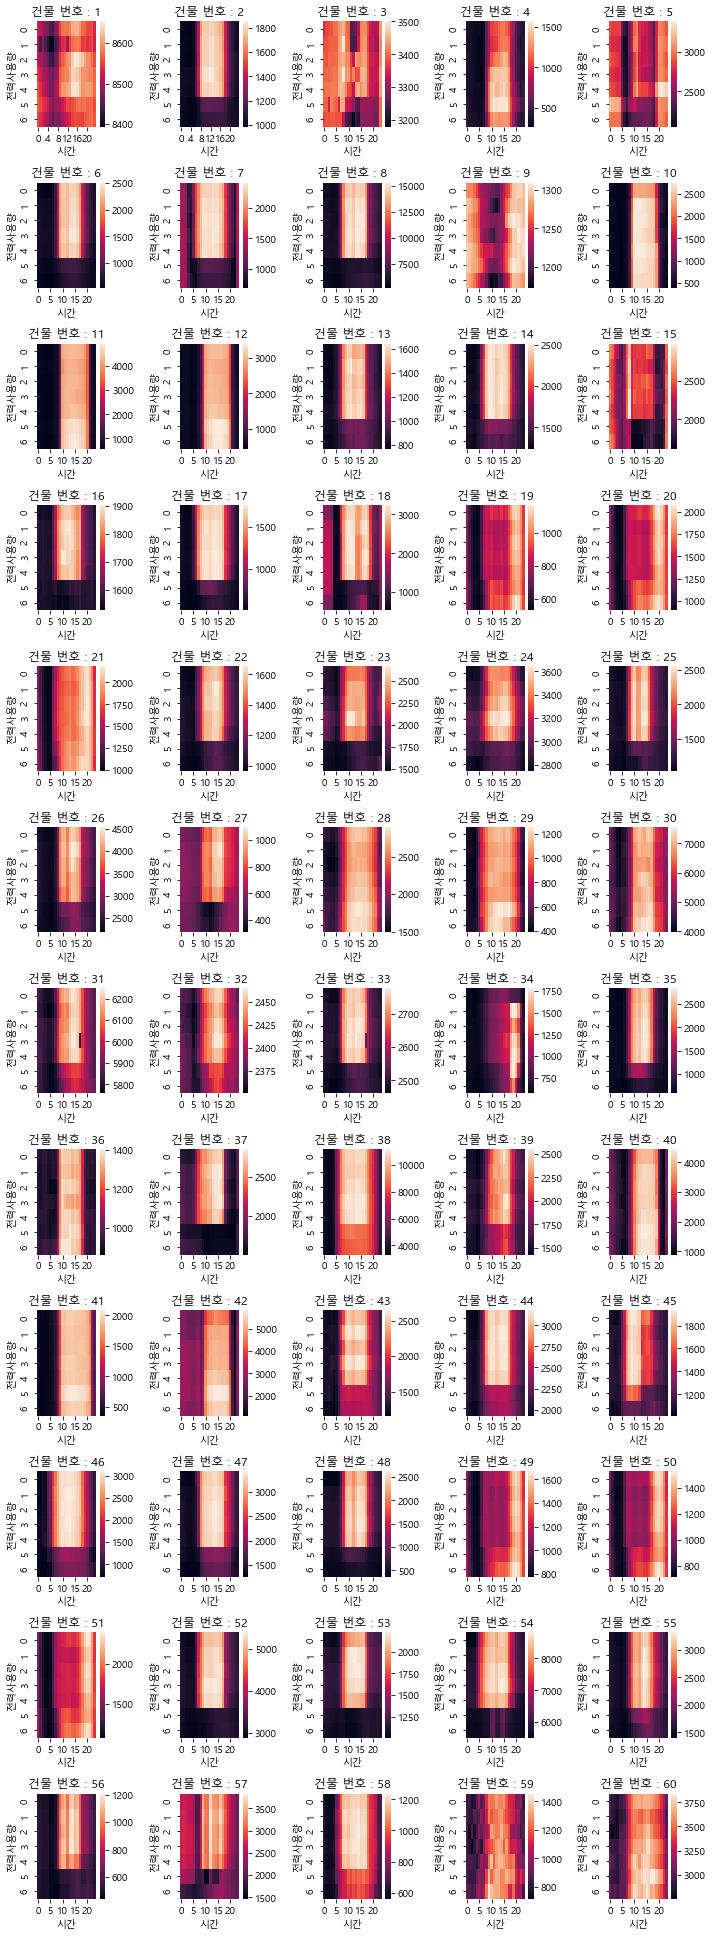

In [5]:
fig = plt.figure(figsize=(10,27))
for x in data["num"].unique() :
    data_hm = data[data["num"] == x].groupby(["day","hour"], 
                sort=True).mean().round(2
            ).reset_index().pivot("day",
                    "hour","전력사용량(kWh)")
    plt.subplot(12,5,x)
    sns.heatmap(data_hm)
    plt.title("건물 번호 : " + str(x))
    plt.xlabel("시간")
    plt.ylabel("전력사용량")
    plt.tight_layout()

# 전력사용량 Percentage로

In [6]:
data_percent =data.loc[:,["num","date_time","전력사용량(kWh)"]]
cal = []
for x in data_percent["num"].unique() :
    data_h= data[data["num"] == x].loc[:,"전력사용량(kWh)"]
    cal.extend((data_h/data_h.max()).values.round(3)*100)
data_percent["전력사용량(kWh)"] = cal
data_percent.rename(columns={"전력사용량(kWh)":"전력사용량(%)"}, inplace=True)
data_percent.head()

,num,date_time,전력사용량(%)
0,1,2020-06-01 00:00:00,92.7
1,1,2020-06-01 01:00:00,92.2
2,1,2020-06-01 02:00:00,91.8
3,1,2020-06-01 03:00:00,91.2
4,1,2020-06-01 04:00:00,91.1


In [7]:
data_cluster = data_percent.pivot("num","date_time","전력사용량(%)")
data_cluster.head()

date_time,2020-06-01 00:00:00,2020-06-01 01:00:00,2020-06-01 02:00:00,2020-06-01 03:00:00,2020-06-01 04:00:00,2020-06-01 05:00:00,2020-06-01 06:00:00,2020-06-01 07:00:00,2020-06-01 08:00:00,2020-06-01 09:00:00,...,2020-08-24 14:00:00,2020-08-24 15:00:00,2020-08-24 16:00:00,2020-08-24 17:00:00,2020-08-24 18:00:00,2020-08-24 19:00:00,2020-08-24 20:00:00,2020-08-24 21:00:00,2020-08-24 22:00:00,2020-08-24 23:00:00
num,,,,,,,,,,,,,,,,,,,,,
1,92.7,92.2,91.8,91.2,91.1,90.7,90.4,90.8,90.9,91.6,...,99.5,99.5,99.4,99.3,99.1,98.7,99.0,98.9,98.8,98.6
2,45.1,44.6,44.9,44.6,44.9,44.9,48.1,54.8,64.4,70.8,...,92.9,92.4,91.0,86.1,79.0,62.5,58.2,56.1,52.0,51.1
3,80.4,80.1,80.2,80.7,80.8,80.3,81.2,81.8,82.5,83.2,...,91.0,90.5,90.4,90.4,90.4,90.3,90.2,90.2,89.7,87.6
4,14.2,16.2,8.5,7.8,7.8,8.2,8.6,9.3,12.1,21.0,...,45.5,51.0,47.4,47.0,36.0,30.6,29.4,23.9,15.7,14.3
5,78.8,80.9,79.7,78.3,80.0,70.2,65.3,58.5,68.0,72.6,...,80.4,80.8,79.9,79.1,70.8,88.4,90.2,88.9,87.9,86.3


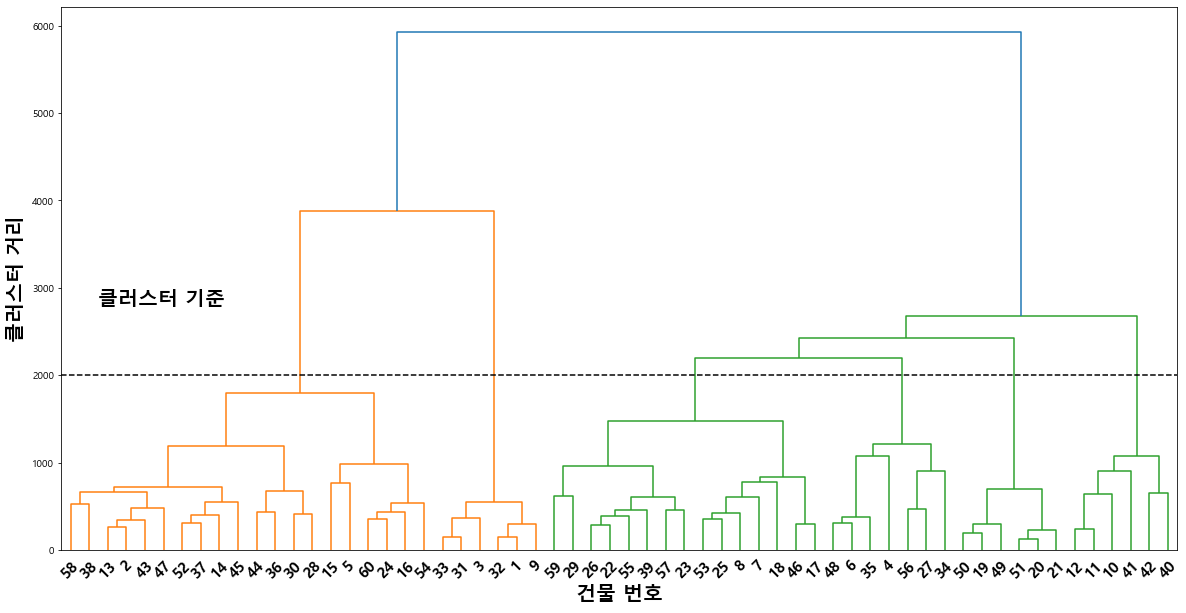

In [8]:
from scipy.cluster.hierarchy import linkage, dendrogram
x = data_cluster.values
labels = data_cluster.index
linked = linkage(x, "ward")
plt.figure(figsize=(20, 10))
dendrogram(linked, orientation="top", labels=labels, distance_sort="descending"
           ,show_leaf_counts=True)
plt.axhline(y=2000, color="k", linestyle="--")
plt.text(x=20,y=2800,s="클러스터 기준", fontsize=20, fontweight="bold")
plt.xticks(rotation=45, fontsize="15", fontweight="bold")
plt.xlabel('건물 번호', fontsize="20", fontweight="bold")
plt.ylabel('클러스터 거리', fontsize="20", fontweight="bold")
plt.show()

In [9]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
for i in range(3,11) :
    cluster = AgglomerativeClustering (n_clusters = i, 
                                       affinity = 'euclidean', linkage = 'ward') 
    score =  silhouette_score(x, cluster.fit_predict(x))
    print("클러스터링 " + str(i) + "개에 따른 해당 실루엣 검정 스코어 값은 : "
          + str(score))
cluster = AgglomerativeClustering (n_clusters = 5, affinity = 'euclidean', linkage = 'ward') 
data_cluster['cluster'] = cluster.fit_predict(x)

클러스터링 3개에 따른 해당 실루엣 검정 스코어 값은 : 0.24015387470931027
클러스터링 4개에 따른 해당 실루엣 검정 스코어 값은 : 0.25275216592197913
클러스터링 5개에 따른 해당 실루엣 검정 스코어 값은 : 0.27300349952855646
클러스터링 6개에 따른 해당 실루엣 검정 스코어 값은 : 0.2650226715580692
클러스터링 7개에 따른 해당 실루엣 검정 스코어 값은 : 0.25490411271224056
클러스터링 8개에 따른 해당 실루엣 검정 스코어 값은 : 0.24910786490784417
클러스터링 9개에 따른 해당 실루엣 검정 스코어 값은 : 0.25394940900647733
클러스터링 10개에 따른 해당 실루엣 검정 스코어 값은 : 0.25486459837537134


In [13]:
data_result = data_cluster.groupby("cluster").mean().transpose().reset_index()
data_result["hour"] = (data_result["date_time"]).dt.hour
data_result["day"]= (data_result["date_time"]).dt.weekday
data_result.rename(columns={0:"1집단",1:"2집단", 2:"3집단", 3:"4집단", 4:"5집단"}, 
                   inplace=True)
data_result.drop(columns="date_time", inplace=True)
data_result

cluster,1집단,2집단,3집단,4집단,5집단,hour,day
0,29.409091,47.960,88.366667,22.216667,39.100000,0,0
1,29.468182,47.110,88.100000,21.366667,33.716667,1,0
2,29.495455,46.175,88.033333,19.916667,30.800000,2,0
3,27.913636,45.095,87.716667,18.483333,29.766667,3,0
4,27.722727,45.040,87.550000,17.916667,29.866667,4,0
...,...,...,...,...,...,...,...
2035,55.795455,72.885,94.050000,77.533333,90.316667,19,0
2036,49.540909,69.330,93.500000,57.633333,91.000000,20,0
2037,44.695455,66.700,93.083333,32.516667,87.100000,21,0
2038,41.213636,62.090,92.950000,20.900000,78.900000,22,0


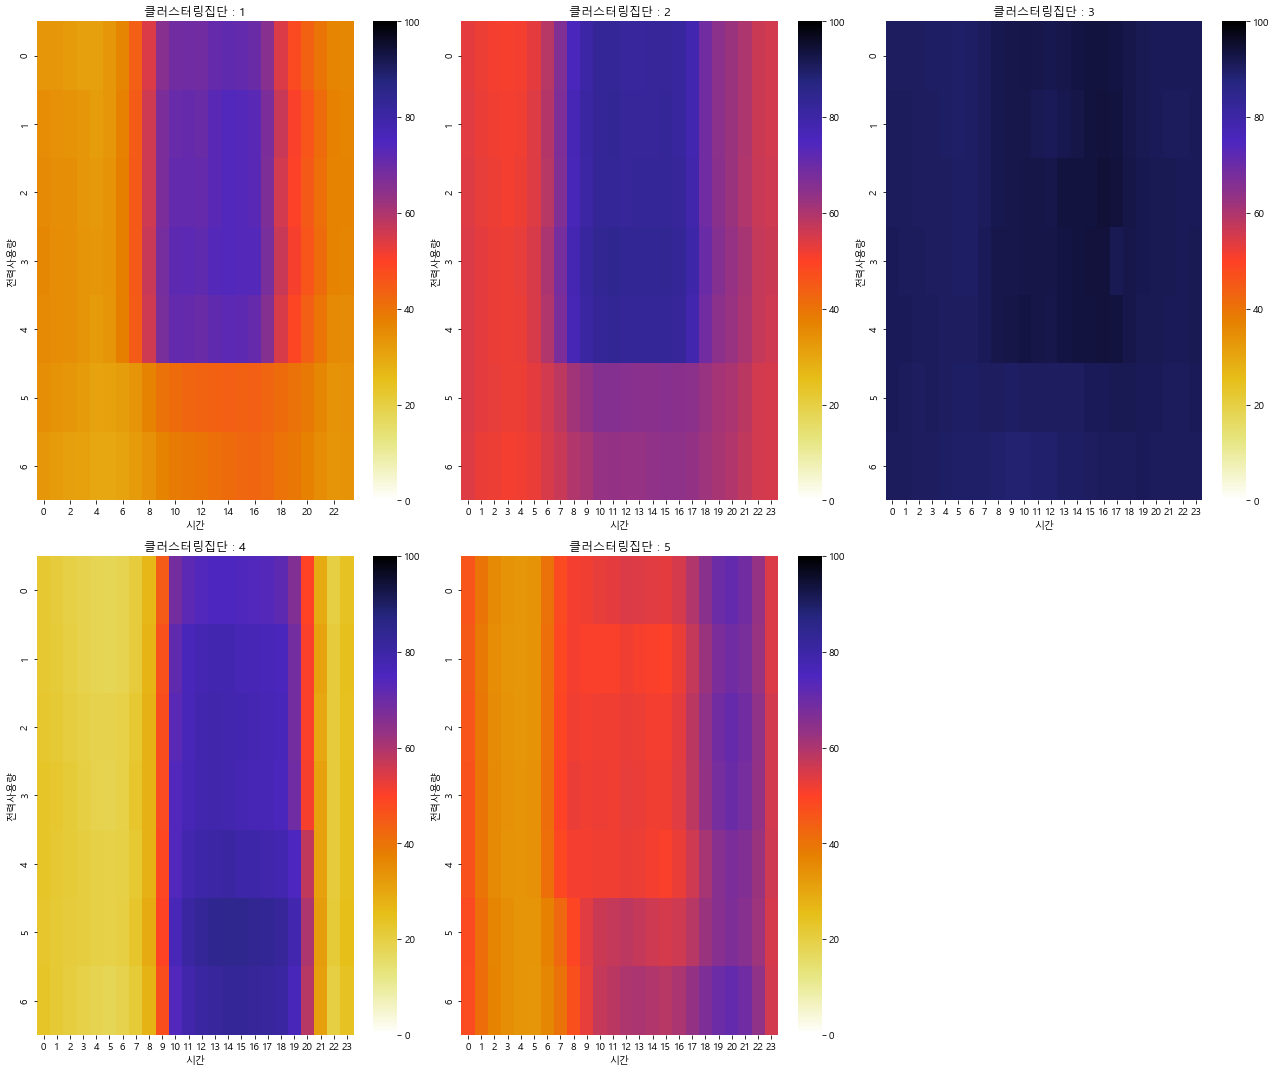

In [14]:
fig = plt.figure(figsize=(18,15))
for x in range(1,6) :
    data_hm = data_result.groupby(["day"
                                   ,"hour"], sort=True
                                 ).mean().round(2).reset_index().pivot(
        "day","hour",f"{x}집단")
    plt.subplot(2,3,x)
    sns.heatmap(data_hm, vmin=0,
                vmax=100, cmap="CMRmap_r")
    plt.title("클러스터링집단 : " + str(x))
    plt.xlabel("시간")
    plt.ylabel("전력사용량")
    plt.tight_layout()

## 1 집단 – 평일 주간에 집중적이며 야간은 약하게 유지 중 -> 회사, 학교

## 2 집단 – 평일 주간에 집중이지만 야간에도 유지 중 -> 공장, 발전소

## 3 집단 – 지속적으로 최대 전력을 사용 중 -> 24시간 공장, 발전소

## 4 집단 – 일주일 동안 주간에 집중적으로 사용 -> 식당, 상가

## 5 집단 – 일주일 동안 오후~야간에 사용 -> 주점, 심야식당

# 태양광 및 비전기냉방운영시설

In [15]:
data["건물용도"] = 0
data

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,hour,day,건물용도
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0,0,0,0,0
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0,0,1,0,0
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0,0,2,0,0
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0,0,3,0,0
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0,0,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19:00:00,4114.368,27.8,2.3,68.0,0.0,0.7,1,1,19,0,0
122396,60,2020-08-24 20:00:00,3975.696,27.3,1.2,71.0,0.0,0.0,1,1,20,0,0
122397,60,2020-08-24 21:00:00,3572.208,27.3,1.8,71.0,0.0,0.0,1,1,21,0,0
122398,60,2020-08-24 22:00:00,3299.184,27.1,1.8,74.0,0.0,0.0,1,1,22,0,0


In [16]:
for item in data["num"].unique() :
    if item in data_cluster[data_cluster["cluster"]==0].index.values:
        data.loc[data[data["num"]==item].index,"건물용도"]=1
    elif item in data_cluster[data_cluster["cluster"]==1].index.values:
        data.loc[data[data["num"]==item].index,"건물용도"]=2
    elif item in data_cluster[data_cluster["cluster"]==2].index.values:
        data.loc[data[data["num"]==item].index,"건물용도"]=3
    elif item in data_cluster[data_cluster["cluster"]==3].index.values:
        data.loc[data[data["num"]==item].index,"건물용도"]=4
    else:
        data.loc[data[data["num"]==item].index,"건물용도"]=5
data

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,hour,day,건물용도
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0,0,0,0,3
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0,0,1,0,3
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0,0,2,0,3
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0,0,3,0,3
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0,0,4,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19:00:00,4114.368,27.8,2.3,68.0,0.0,0.7,1,1,19,0,2
122396,60,2020-08-24 20:00:00,3975.696,27.3,1.2,71.0,0.0,0.0,1,1,20,0,2
122397,60,2020-08-24 21:00:00,3572.208,27.3,1.8,71.0,0.0,0.0,1,1,21,0,2
122398,60,2020-08-24 22:00:00,3299.184,27.1,1.8,74.0,0.0,0.0,1,1,22,0,2


In [20]:
data[data["건물용도"]==2]["num"].unique()

array([ 2,  5, 13, 14, 15, 16, 24, 28, 30, 36, 37, 38, 43, 44, 45, 47, 52,
       54, 58, 60], dtype=int64)

In [18]:
data_g = data.groupby(["건물용도"],
                      sort=True)[[
    '비전기냉방설비운영','태양광보유']].mean()
data_g

,비전기냉방설비운영,태양광보유
건물용도,,
1,0.681818,0.409091
2,0.900000,0.650000
3,0.500000,0.333333
4,0.833333,0.500000
5,0.000000,0.333333


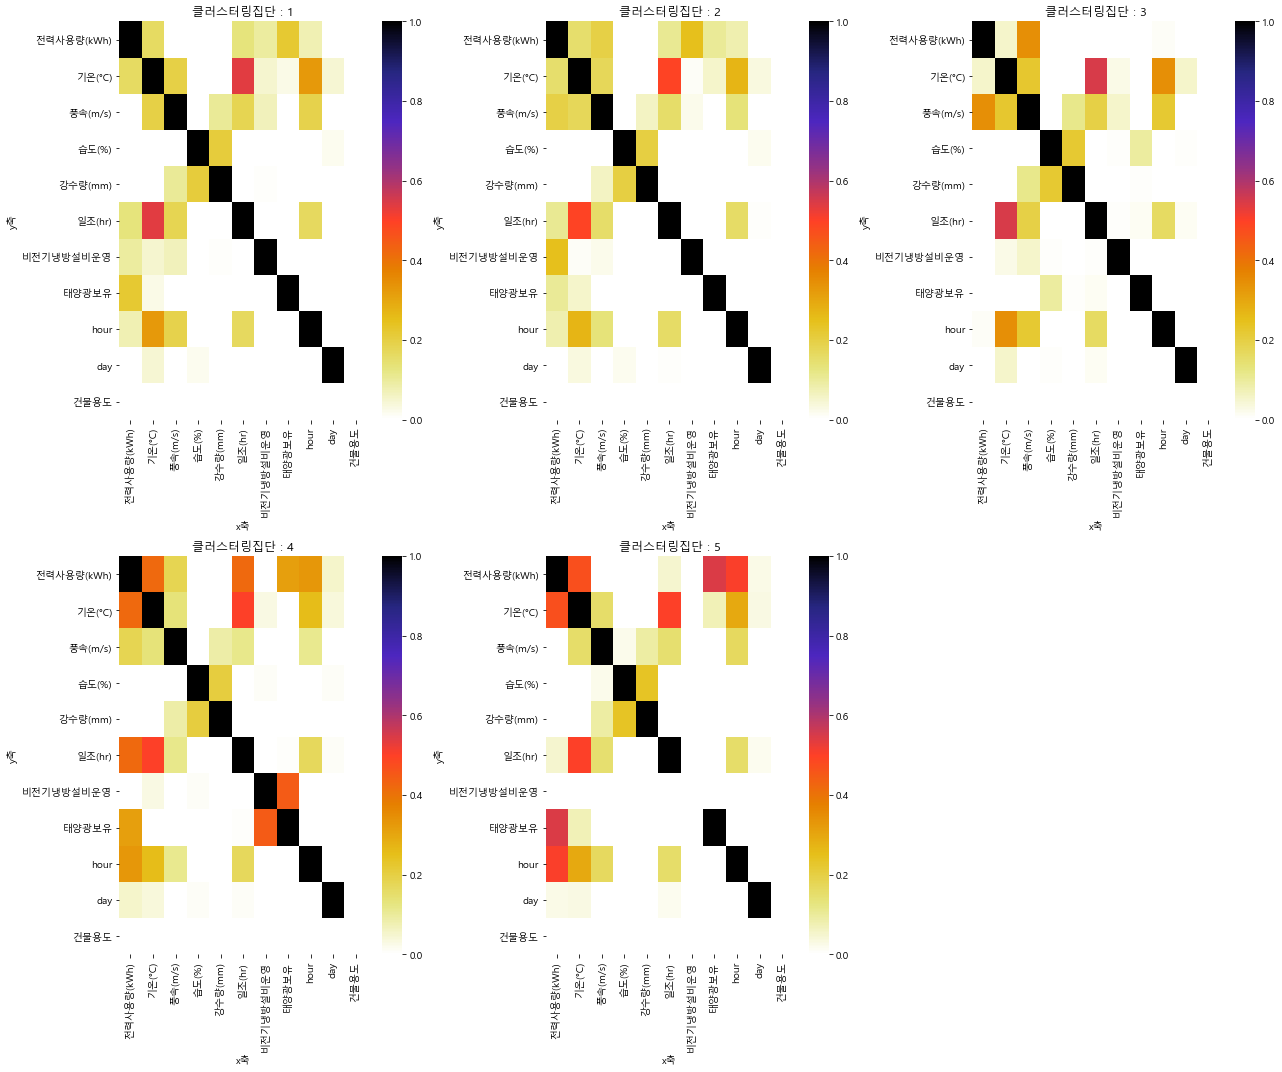

In [19]:
fig = plt.figure(figsize=(18,15))
for x in data["건물용도"].unique() :
    data_g = data[data['건물용도']==x].groupby(["num","date_time"], sort=True).mean().round(2)
    plt.subplot(2,3,x)
    sns.heatmap(data_g.corr(),vmin=0, cmap="CMRmap_r")
    plt.title("클러스터링집단 : " + str(x))
    plt.xlabel("x축")
    plt.ylabel("y축")
    plt.tight_layout()